In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
...,...,...,...,...,...,...,...,...,...,...
763,10,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,B
764,2,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,A
765,5,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,C
766,1,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,C


In [3]:
diabetes.head()


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
# new_row={'Number_pregnant':1, 'Glucose_concentration':0.703418, 'Blood_pressure':0.443812, 'Triceps':0.353535,
#        'Insulin':0.182534, 'BMI':0.500745, 'Pedigree':0.353629, 'Age':47, 'Class':1, 'Group':'B'}
# diabetes=diabetes.append(new_row,ignore_index=True)
# print(diabetes)

     Number_pregnant  Glucose_concentration  Blood_pressure   Triceps  \
0                  6               0.743719        0.590164  0.353535   
1                  1               0.427136        0.540984  0.292929   
2                  8               0.919598        0.524590  0.000000   
3                  1               0.447236        0.540984  0.232323   
4                  0               0.688442        0.327869  0.353535   
..               ...                    ...             ...       ...   
764                2               0.613065        0.573770  0.272727   
765                5               0.608040        0.590164  0.232323   
766                1               0.633166        0.491803  0.000000   
767                1               0.467337        0.573770  0.313131   
768                1               0.703418        0.443812  0.353535   

      Insulin       BMI  Pedigree  Age  Class Group  
0    0.000000  0.500745  0.234415   50      1     B  
1    0.000000  

In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
#Feature engineering
import tensorflow as tf


In [8]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
gluc_con=tf.feature_column.numeric_column('Glucose_concentration')
dias_bp=tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
#categorical features
grp_assigned=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

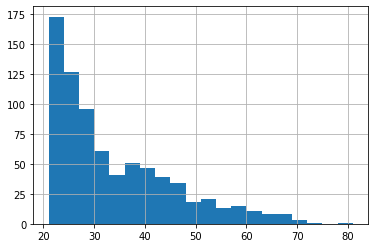

In [11]:
diabetes['Age'].hist(bins=20)

In [12]:
age_buckets=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [13]:
feature_cols=[num_preg,gluc_con,dias_bp,tricep,insulin,bmi,diabetes_pedigree,grp_assigned,age_buckets]

In [14]:
x_data=diabetes[:767].drop('Class',axis=1)
y_data=diabetes['Class'][:767]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,random_state=101)

In [17]:
model=tf.estimator.LinearClassifier(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Vallabh\\AppData\\Local\\Temp\\tmp_gpahm8j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [19]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Ins

In [20]:
eval_input_func=input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [21]:
model_results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-29T17:26:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8j\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.88079s
INFO:tensorflow:Finished evaluation at 2020-09-29-17:26:15
INFO:tensorflow:Saving dict for global step 1000

In [22]:
model_results

{'accuracy': 0.7552083,
 'accuracy_baseline': 0.6979167,
 'auc': 0.8177432,
 'auc_precision_recall': 0.6161194,
 'average_loss': 0.5044805,
 'label/mean': 0.30208334,
 'loss': 0.5089629,
 'precision': 0.6,
 'prediction/mean': 0.37357295,
 'recall': 0.5689655,
 'global_step': 1000}

In [23]:
#prediction


predict_input_fn=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
predictions=model.predict(predict_input_fn)
list(predictions)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8j\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.16866452], dtype=float32),
  'logistic': array([0.45793355], dtype=float32),
  'probabilities': array([0.54206645, 0.45793355], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.11666036], dtype=float32),
  'logistic': array([0.52913207], dtype=float32),
  'probabilities': array([0.47086796, 0.52913207], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.3893236], dtype=float32),
  'logistic': array([0.40388012], dtype=float32),
  'probabilities': array([0.5961198 , 0.40388015], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)

In [24]:
#Using DNN
model2=tf.estimator.DNNClassifier([10,10,8],feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Vallabh\\AppData\\Local\\Temp\\tmpbcbpckkz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
embedded_group=tf.feature_column.embedding_column(grp_assigned,dimension=4)

In [26]:
feature_cols=[num_preg,gluc_con,dias_bp,tricep,insulin,bmi,diabetes_pedigree,embedded_group,age_buckets]

In [27]:
model2=tf.estimator.DNNClassifier([100,100,40],feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Vallabh\\AppData\\Local\\Temp\\tmp8vxaewr1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8j\model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8

In [29]:
results=model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-29T17:26:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8j\model.ckpt-1020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.83474s
INFO:tensorflow:Finished evaluation at 2020-09-29-17:26:45
INFO:tensorflow:Saving dict for global step 1020

{'accuracy': 0.7604167,
 'accuracy_baseline': 0.6979167,
 'auc': 0.81954455,
 'auc_precision_recall': 0.6232725,
 'average_loss': 0.498482,
 'label/mean': 0.30208334,
 'loss': 0.5032136,
 'precision': 0.61538464,
 'prediction/mean': 0.36035326,
 'recall': 0.55172414,
 'global_step': 1020}

In [30]:
prediction=model.predict(predict_input_fn)
list(prediction)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vallabh\AppData\Local\Temp\tmp_gpahm8j\model.ckpt-1020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.23780221], dtype=float32),
  'logistic': array([0.44082803], dtype=float32),
  'probabilities': array([0.559172  , 0.44082803], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.10883522], dtype=float32),
  'logistic': array([0.527182], dtype=float32),
  'probabilities': array([0.47281802, 0.527182  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.48104274], dtype=float32),
  'logistic': array([0.38200593], dtype=float32),
  'probabilities': array([0.61799407, 0.38200593], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)}